<a href="https://colab.research.google.com/github/TejusM1997/Bankruptcy_prediction/blob/main/Bankruptcy_prediction_with_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow import keras
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
df=pd.read_csv('Bankruptcy_predict.csv')
df.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),...,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Current Liabilities/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Current Liability to Liability,Current Liability to Equity,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,0.780985,1.256969e-04,0.0,0.458143,0.000725,0.0,0.147950,0.147950,0.147950,0.169141,0.311664,0.017560,0.095921,0.138736,0.022102,0.848195,0.688979,0.688979,0.217535,4.980000e+09,0.000327,0.263100,0.363725,0.002259,0.001208,0.629951,0.021266,0.207576,0.792424,0.005024,...,0.190643,0.004094,0.001997,1.473360e-04,0.147308,0.334015,0.276920,0.001036,0.676269,0.721275,0.339077,0.025592,0.903225,0.002022,0.064856,7.010000e+08,6.550000e+09,0.593831,4.580000e+08,0.671568,0.424206,0.676269,0.339077,0.126549,0.637555,0.458609,0.520382,0.312905,0.118250,0,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,0.781506,2.897851e-04,0.0,0.461867,0.000647,0.0,0.182251,0.182251,0.182251,0.208944,0.318137,0.021144,0.093722,0.169918,0.022080,0.848088,0.689693,0.689702,0.217620,6.110000e+09,0.000443,0.264516,0.376709,0.006016,0.004039,0.635172,0.012502,0.171176,0.828824,0.005059,...,0.182419,0.014948,0.004136,1.383910e-03,0.056963,0.341106,0.289642,0.005210,0.308589,0.731975,0.329740,0.023947,0.931065,0.002226,0.025516,1.065198e-04,7.700000e+09,0.593916,2.490000e+09,0.671570,0.468828,0.308589,0.329740,0.120916,0.641100,0.459001,0.567101,0.314163,0.047775,0,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,0.780284,2.361297e-04,25500000.0,0.458521,0.000790,0.0,0.177911,0.177911,0.193713,0.180581,0.307102,0.005944,0.092338,0.142803,0.022760,0.848094,0.689463,0.689470,0.217601,7.280000e+09,0.000396,0.264184,0.368913,0.011543,0.005348,0.629631,0.021248,0.207516,0.792484,0.005100,..

In [3]:
df.shape

(6819, 96)

In [4]:
df.dtypes.value_counts()

float64    93
int64       3
dtype: int64

In [5]:
# Lets see which are the variables with int64 datatype
df.describe(exclude='float64')

,Bankrupt?,Liability-Assets Flag,Net Income Flag
count,6819.000000,6819.000000,6819.0
mean,0.032263,0.001173,1.0
std,0.176710,0.034234,0.0
min,0.000000,0.000000,1.0
25%,0.000000,0.000000,1.0
50%,0.000000,0.000000,1.0
75%,0.000000,0.000000,1.0
max,1.000000,1.000000,1.0


**Check Missing Values**

In [6]:
missing= [feature for feature in df.columns if df[feature].isnull().sum()]
missing
# There are no missing values therefore we can proceed

[]

**Exploratory Data Analysis**

1) Check for Class Imbalance

In [7]:
print('Financially Stable :',round(df['Bankrupt?'].value_counts()[0]/len(df)*100,2),'%')
print('Financially Unstable :',round(df['Bankrupt?'].value_counts()[1]/len(df)*100,2),'%')

Financially Stable : 96.77 %
Financially Unstable : 3.23 %


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Class Distributions')

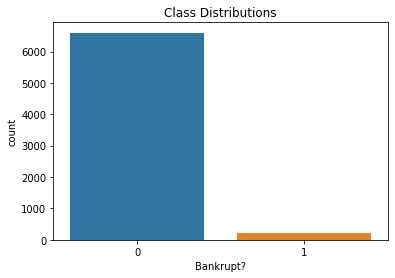

In [8]:
sns.countplot(df['Bankrupt?'])
plt.title('Class Distributions')

It can be seen that the class imbalance is too high therefore its necessary to perform under or over sampling techniques

2) Correlation Matrix

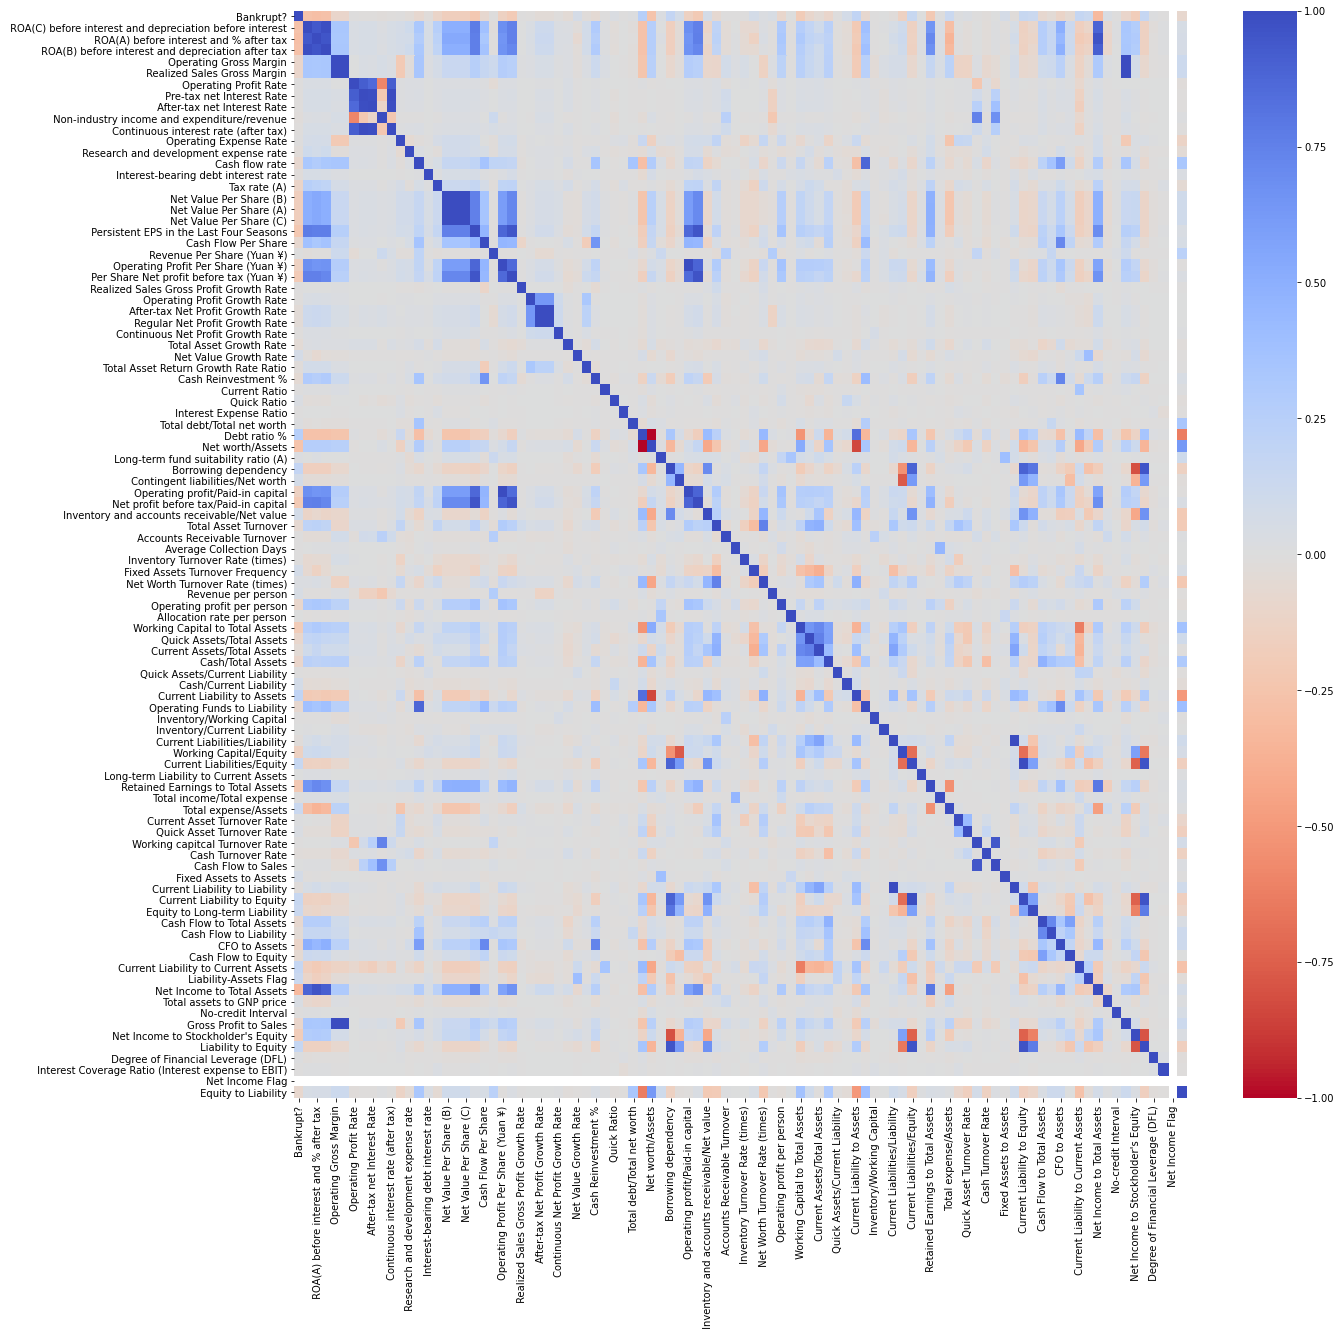

In [9]:
plt.figure(figsize=(20,20))
corr=df.corr()
sns.heatmap(corr, cmap = 'coolwarm_r', annot_kws = {'size': 20})

2) Stock Performance trend

In [10]:
df.columns

Index(['Bankrupt?', ' ROA(C) before interest and depreciation before interest',
       ' ROA(A) before interest and % after tax',
       ' ROA(B) before interest and depreciation after tax',
       ' Operating Gross Margin', ' Realized Sales Gross Margin',
       ' Operating Profit Rate', ' Pre-tax net Interest Rate',
       ' After-tax net Interest Rate',
       ' Non-industry income and expenditure/revenue',
       ' Continuous interest rate (after tax)', ' Operating Expense Rate',
       ' Research and development expense rate', ' Cash flow rate',
       ' Interest-bearing debt interest rate', ' Tax rate (A)',
       ' Net Value Per Share (B)', ' Net Value Per Share (A)',
       ' Net Value Per Share (C)', ' Persistent EPS in the Last Four Seasons',
       ' Cash Flow Per Share', ' Revenue Per Share (Yuan ¥)',
       ' Operating Profit Per Share (Yuan ¥)',
       ' Per Share Net profit before tax (Yuan ¥)',
       ' Realized Sales Gross Profit Growth Rate',
       ' Operating Profit

In [11]:
Stock=[' Net Value Per Share (B)', ' Net Value Per Share (A)',
       ' Net Value Per Share (C)', ' Persistent EPS in the Last Four Seasons',
       ' Cash Flow Per Share', ' Revenue Per Share (Yuan ¥)',
       ' Operating Profit Per Share (Yuan ¥)',
       ' Per Share Net profit before tax (Yuan ¥)',]

In [12]:
stock_df= df[Stock]
stock_df.head()

,Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥)
0,0.147950,0.147950,0.147950,0.169141,0.311664,0.017560,0.095921,0.138736
1,0.182251,0.182251,0.182251,0.208944,0.318137,0.021144,0.093722,0.169918
2,0.177911,0.177911,0.193713,0.180581,0.307102,0.005944,0.092338,0.142803
3,0.154187,0.154187,0.154187,0.193722,0.321674,0.014368,0.077762,0.148603
4,0.167502,0.167502,0.167502,0.212537,0.319162,0.029690,0.096898,0.168412


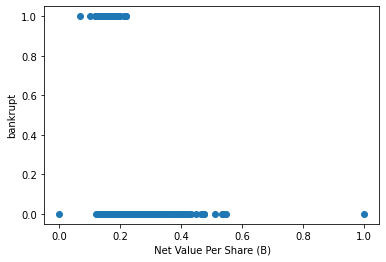

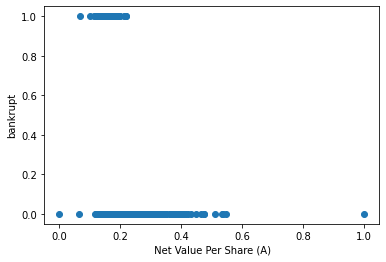

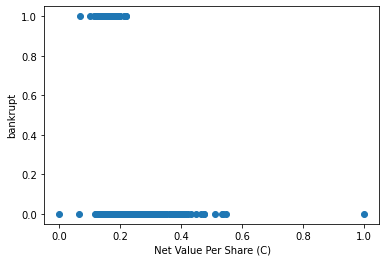

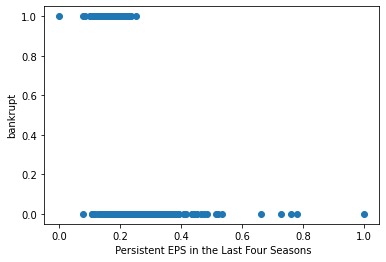

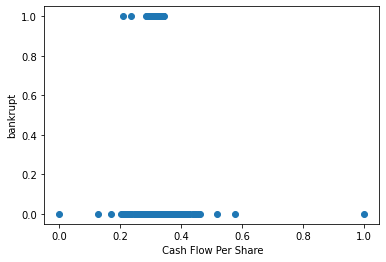

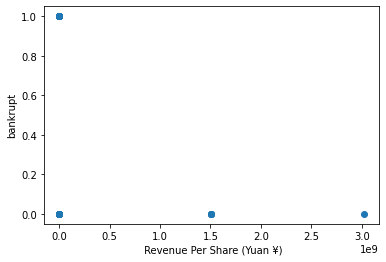

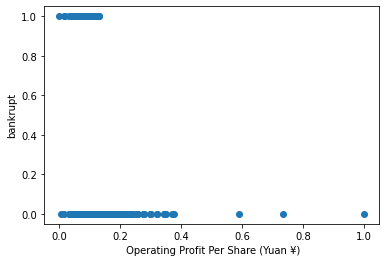

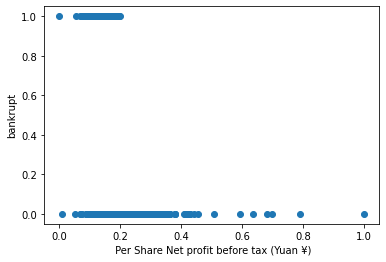

In [15]:
for feature in Stock:
  data=df.copy()
  plt.scatter(data[feature],data['Bankrupt?'])
  plt.xlabel(feature)
  plt.ylabel('bankrupt')
  plt.show()

4) Net values 

In [18]:
feature_cols=df.columns

In [19]:
net_features=[feature for feature in feature_cols if 'Net' in feature or 'net' in feature ]
net_features

[' Pre-tax net Interest Rate',
 ' After-tax net Interest Rate',
 ' Net Value Per Share (B)',
 ' Net Value Per Share (A)',
 ' Net Value Per Share (C)',
 ' Per Share Net profit before tax (Yuan ¥)',
 ' After-tax Net Profit Growth Rate',
 ' Regular Net Profit Growth Rate',
 ' Continuous Net Profit Growth Rate',
 ' Net Value Growth Rate',
 ' Total debt/Total net worth',
 ' Net worth/Assets',
 ' Contingent liabilities/Net worth',
 ' Net profit before tax/Paid-in capital',
 ' Inventory and accounts receivable/Net value',
 ' Net Worth Turnover Rate (times)',
 ' Net Income to Total Assets',
 " Net Income to Stockholder's Equity",
 ' Net Income Flag']

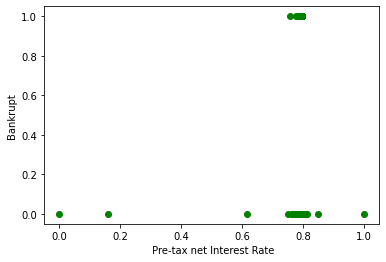

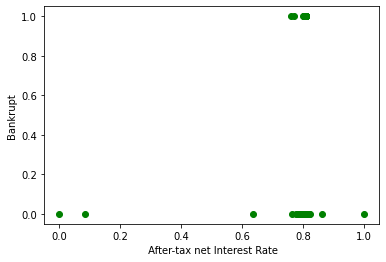

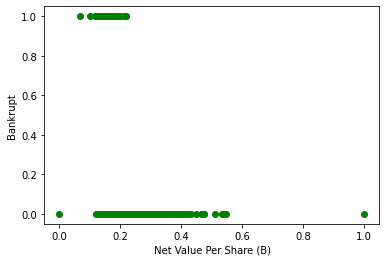

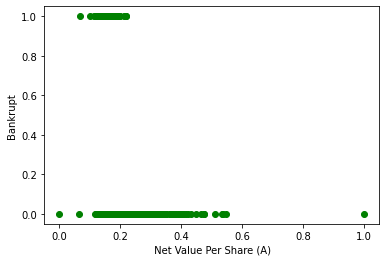

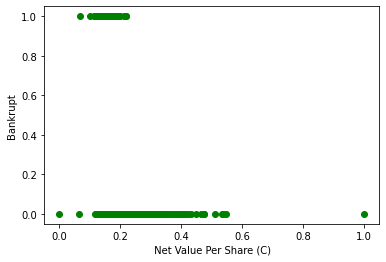

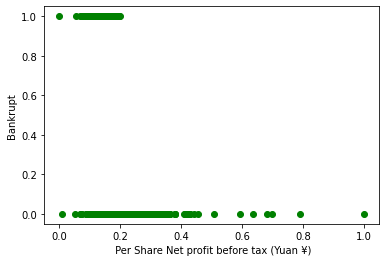

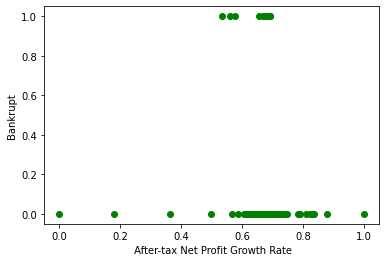

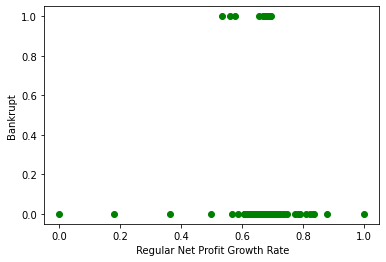

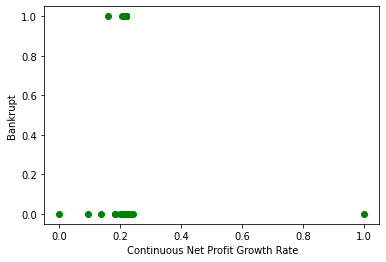

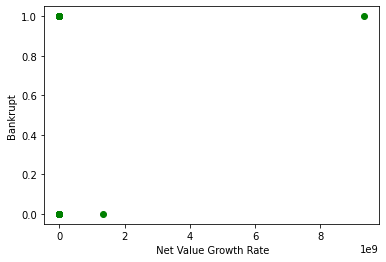

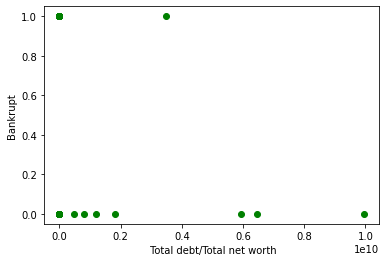

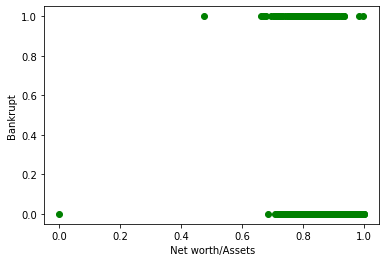

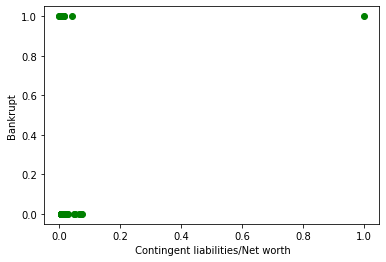

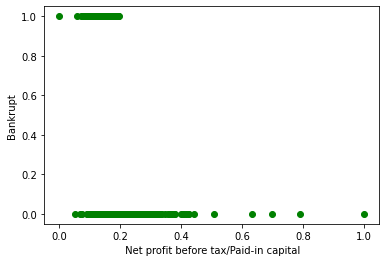

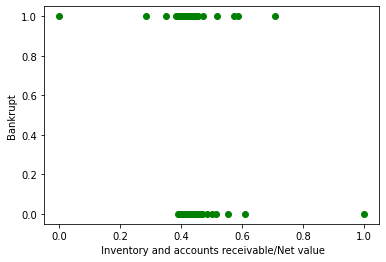

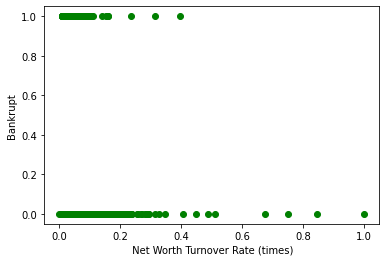

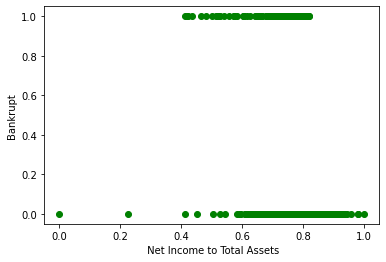

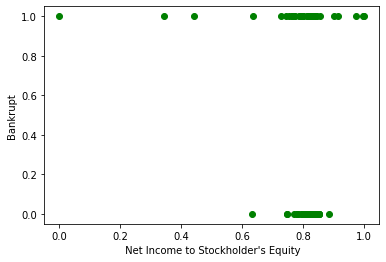

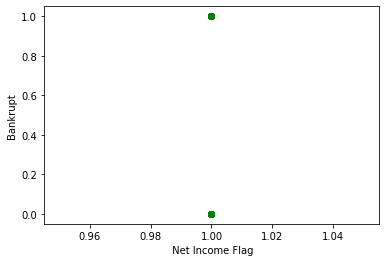

In [21]:
for feature in net_features:
  data=df.copy()
  plt.scatter(data[feature],data['Bankrupt?'],c='g')
  plt.xlabel(feature)
  plt.ylabel('Bankrupt')
  plt.show()

**Data Preprocessing**

1) Feature Scaling

In [24]:
# For Artificial Neural Network(ANN) its preferable to scale the features in the range between 0-1
from sklearn.preprocessing import Normalizer
normal= Normalizer()

In [26]:
# Some features have values more than 2 while most of them range between 0-1
cols_for_scale = df.max()[df.max()>1]
cols_for_scale

 Operating Expense Rate                   9.990000e+09
 Research and development expense rate    9.980000e+09
 Interest-bearing debt interest rate      9.900000e+08
 Revenue Per Share (Yuan ¥)               3.020000e+09
 Total Asset Growth Rate                  9.990000e+09
 Net Value Growth Rate                    9.330000e+09
 Current Ratio                            2.750000e+09
 Quick Ratio                              9.230000e+09
 Total debt/Total net worth               9.940000e+09
 Accounts Receivable Turnover             9.740000e+09
 Average Collection Days                  9.730000e+09
 Inventory Turnover Rate (times)          9.990000e+09
 Fixed Assets Turnover Frequency          9.990000e+09
 Revenue per person                       8.810000e+09
 Allocation rate per person               9.570000e+09
 Quick Assets/Current Liability           8.820000e+09
 Cash/Current Liability                   9.650000e+09
 Inventory/Current Liability              9.910000e+09
 Long-term

In [29]:
scaled=normal.fit_transform(df[cols_for_scale.keys()])
i=0
for col in cols_for_scale.keys():
  df[col]= scaled[:,i]
  i+=1

In [30]:
df[cols_for_scale.keys()].describe()

,Operating Expense Rate,Research and development expense rate,Interest-bearing debt interest rate,Revenue Per Share (Yuan ¥),Total Asset Growth Rate,Net Value Growth Rate,Current Ratio,Quick Ratio,Total debt/Total net worth,Accounts Receivable Turnover,Average Collection Days,Inventory Turnover Rate (times),Fixed Assets Turnover Frequency,Revenue per person,Allocation rate per person,Quick Assets/Current Liability,Cash/Current Liability,Inventory/Current Liability,Long-term Liability to Current Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Cash Turnover Rate,Fixed Assets to Assets,Total assets to GNP price
count,6.819000e+03,6.819000e+03,6.819000e+03,6.819000e+03,6819.000000,6.819000e+03,6.819000e+03,6.819000e+03,6.819000e+03,6.819000e+03,6.819000e+03,6.819000e+03,6.819000e+03,6.819000e+03,6.819000e+03,6.819000e+03,6.819000e+03,6.819000e+03,6.819000e+03,6.819000e+03,6.819000e+03,6.819000e+03,6.819000e+03,6.819000e+03
mean,1.661826e-01,1.798982e-01,2.793805e-03,2.837294e-03,0.521366,2.526750e-04,1.807180e-03,2.238776e-03,8.128968e-04,1.571919e-03,1.423180e-03,1.933575e-01,8.840989e-02,1.945250e-03,1.245806e-03,1.932987e-03,5.402385e-03,6.385116e-03,5.054701e-03,9.047842e-02,1.663581e-01,2.136371e-01,5.369853e-03,1.864470e-03
std,2.686726e-01,2.439265e-01,3.347629e-02,3.656447e-02,0.295456,9.261127e-03,2.253940e-02,2.882217e-02,1.890347e-02,3.106988e-02,2.411954e-02,2.864683e-01,2.128948e-01,2.755262e-02,2.713023e-02,2.565646e-02,5.238207e-02,6.060400e-02,5.057847e-02,2.095006e-01,2.567653e-01,2.511621e-01,6.399606e-02,3.355149e-02
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.519550e-14,1.374627e-14,1.739469e-14,1.512247e-12,0.394648,3.509776e-14,6.475588e-13,3.979811e-13,2.913931e-13,6.411360e-14,3.772009e-13,1.791741e-14,2.308267e-14,9.831407e-13,3.929599e-13,4.352061e-13,1.791773e-13,2.979310e-13,0.000000e+00,1.332994e-14,1.436237e-14,3.557629e-14,8.655750e-12,9.018238e-14
50%,3.398208e-14,4.866544e-02,3.003037e-14,2.608393e-12,0.555354,4.303322e-14,1.008187e-12,6.812818e-13,5.222331e-13,9.161320e-14,5.993148e-13,1.054952e-13,6.286312e-14,1.830002e-12,7.619823e-13,7.442508e-13,4.363585e-13,6.027074e-13,1.842331e-13,2.170159e-14,2.879315e-14,1.030018e-01,1.995942e-11,2.105962e-13
75%,3.595572e-01,3.099536e-01,5.203387e-14,4.632151e-12,0.715952,5.799017e-14,1.793761e-12,1.348215e-12,9.342875e-13,1.542349e-13,9.488824e-13,4.370100e-01,5.004799e-13,3.950738e-12,1.544504e-12,1.423051e-12,1.340645e-12,1.131049e-12,8.563656e-13,7.644453e-14,3.958447e-01,3.939487e-01,3.598065e-11,5.595239e-13
max,1.000000e+00,1.000000e+00,1.000000e+00,8.487490e-01,1.000000,6.529784e-01,5.367221e-01,9.979026e-01,1.000000e+00,9.920834e-01,9.206153e-01,1.000000e+00,1.000000e+00,7.887874e-01,9.990426e-01,7.718045e-01,9.045574e-01,1.000000e+00,1.000000e+00,9.948360e-01,1.000000e+00,1.000000e+00,9.939660e-01,7.900241e-01


In [31]:
from sklearn.preprocessing import MinMaxScaler
scale=MinMaxScaler()

In [32]:
scaled=scale.fit_transform(df[cols_for_scale.keys()])
i=0
for col in cols_for_scale.keys():
  df[col]= scaled[:,i]
  i+=1

In [33]:
df[cols_for_scale.keys()].describe()

,Operating Expense Rate,Research and development expense rate,Interest-bearing debt interest rate,Revenue Per Share (Yuan ¥),Total Asset Growth Rate,Net Value Growth Rate,Current Ratio,Quick Ratio,Total debt/Total net worth,Accounts Receivable Turnover,Average Collection Days,Inventory Turnover Rate (times),Fixed Assets Turnover Frequency,Revenue per person,Allocation rate per person,Quick Assets/Current Liability,Cash/Current Liability,Inventory/Current Liability,Long-term Liability to Current Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Cash Turnover Rate,Fixed Assets to Assets,Total assets to GNP price
count,6.819000e+03,6.819000e+03,6.819000e+03,6.819000e+03,6819.000000,6.819000e+03,6.819000e+03,6.819000e+03,6.819000e+03,6.819000e+03,6.819000e+03,6.819000e+03,6.819000e+03,6.819000e+03,6.819000e+03,6.819000e+03,6.819000e+03,6.819000e+03,6.819000e+03,6.819000e+03,6.819000e+03,6.819000e+03,6.819000e+03,6.819000e+03
mean,1.661826e-01,1.798982e-01,2.793805e-03,3.342912e-03,0.521366,3.869577e-04,3.367069e-03,2.243481e-03,8.128968e-04,1.584463e-03,1.545901e-03,1.933575e-01,8.840989e-02,2.466127e-03,1.247000e-03,2.504503e-03,5.972407e-03,6.385116e-03,5.054701e-03,9.094807e-02,1.663581e-01,2.136371e-01,5.402452e-03,2.360017e-03
std,2.686726e-01,2.439265e-01,3.347629e-02,4.308042e-02,0.295456,1.418290e-02,4.199454e-02,2.888275e-02,1.890347e-02,3.131781e-02,2.619937e-02,2.864683e-01,2.128948e-01,3.493034e-02,2.715623e-02,3.324218e-02,5.790906e-02,6.060400e-02,5.057847e-02,2.105881e-01,2.567653e-01,2.511621e-01,6.438455e-02,4.246894e-02
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.519550e-14,1.374627e-14,1.739469e-14,1.781736e-12,0.394648,5.375026e-14,1.206507e-12,3.988175e-13,2.913931e-13,6.462521e-14,4.097269e-13,1.791741e-14,2.308267e-14,1.246395e-12,3.933365e-13,5.638812e-13,1.980828e-13,2.979310e-13,0.000000e+00,1.339914e-14,1.436237e-14,3.557629e-14,8.708296e-12,1.141514e-13
50%,3.398208e-14,4.866544e-02,3.003037e-14,3.073221e-12,0.555354,6.590297e-14,1.878416e-12,6.827137e-13,5.222331e-13,9.234425e-14,6.509937e-13,1.054952e-13,6.286312e-14,2.320019e-12,7.627126e-13,9.642996e-13,4.824001e-13,6.027074e-13,1.842331e-13,2.181424e-14,2.879315e-14,1.030018e-01,2.008058e-11,2.665693e-13
75%,3.595572e-01,3.099536e-01,5.203387e-14,5.457621e-12,0.715952,8.880871e-14,3.342066e-12,1.351049e-12,9.342875e-13,1.554656e-13,1.030705e-12,4.370100e-01,5.004799e-13,5.008622e-12,1.545984e-12,1.843797e-12,1.482101e-12,1.131049e-12,8.563656e-13,7.684133e-14,3.958447e-01,3.939487e-01,3.619908e-11,7.082365e-13
max,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


2) Over Sampling the Data

In [34]:
X,y= df.drop('Bankrupt?',axis=1),df['Bankrupt?']
X.shape,y.shape

((6819, 95), (6819,))

In [35]:
smote=SMOTE(sampling_strategy='minority')
X_res,y_res=smote.fit_resample(X,y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [36]:
print(X_res.shape)
print(y_res.shape)

(13198, 95)
(13198,)


In [38]:
print(type(X_res))
print(type(y_res))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [39]:
X_re=pd.DataFrame(X_res,columns=X.columns)
y_re=pd.DataFrame(y_res,columns=['Bankrupt?'])

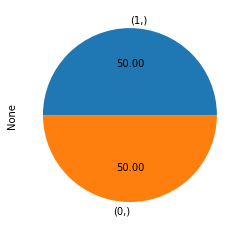

In [40]:
y_re.value_counts().plot(kind='pie',autopct="%.2f")
plt.show()

3) Splitting the Data

In [41]:
x_train,x_test,y_train,y_test = train_test_split(X_re, y_re, test_size=0.3)

**Model Building**

1) ANN

In [46]:
import tensorflow as tf


In [47]:
initializer = tf.keras.initializers.HeNormal()
model = keras.Sequential([
    keras.layers.Dense(95,input_shape=(95,),activation='relu',kernel_initializer=initializer),
    keras.layers.Dense(1,activation='sigmoid')
])

In [49]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [50]:
model.fit(x_train,y_train,epochs=200)

Epoch 1/200
289/289 [==============================] - 1s 1ms/step - loss: 0.5366 - accuracy: 0.7590
Epoch 2/200
289/289 [==============================] - 0s 1ms/step - loss: 0.3669 - accuracy: 0.8638
Epoch 3/200
289/289 [==============================] - 0s 1ms/step - loss: 0.3210 - accuracy: 0.8781
Epoch 4/200
289/289 [==============================] - 0s 1ms/step - loss: 0.3017 - accuracy: 0.8830
Epoch 5/200
289/289 [==============================] - 0s 1ms/step - loss: 0.2906 - accuracy: 0.8890
Epoch 6/200
289/289 [==============================] - 0s 1ms/step - loss: 0.2850 - accuracy: 0.8868
Epoch 7/200
289/289 [==============================] - 0s 1ms/step - loss: 0.2747 - accuracy: 0.8910
Epoch 8/200
289/289 [==============================] - 0s 1ms/step - loss: 0.2709 - accuracy: 0.8931
Epoch 9/200
289/289 [==============================] - 0s 1ms/step - loss: 0.2686 - accuracy: 0.8953
Epoch 10/200
289/289 [==============================] - 0s 1ms/step - loss: 0.2637 - accura

In [51]:
from sklearn.metrics import classification_report,confusion_matrix

In [52]:
def predict(model,x):
    pred  = model.predict(x)
    pred[pred >= 0.5] = 1
    pred[pred < 0.5] = 0
    return pred

def predict_graph(y_true,y_pred,title):
    cm = confusion_matrix(y_true,y_pred)
    plt.figure(figsize=(7,7))
    sns.heatmap(cm,annot=True,fmt='g',cmap="YlGnBu",
                xticklabels=['No Bankruptcy','Bankruptcy'],yticklabels=['No Bankruptcy','Bankruptcy'])
    plt.title(title)
    plt.show()
    
    print("\n")
    print("Classification Report:")
    print(classification_report(y_true,y_pred))

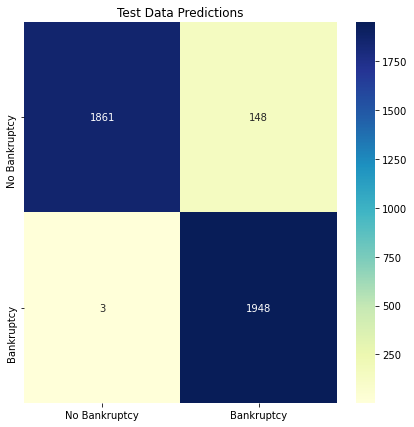



Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.93      0.96      2009
           1       0.93      1.00      0.96      1951

    accuracy                           0.96      3960
   macro avg       0.96      0.96      0.96      3960
weighted avg       0.96      0.96      0.96      3960



In [53]:
# Test Set prediction
y_test_pred = predict(model,x_test)
predict_graph(y_test,y_test_pred,'Test Data Predictions')

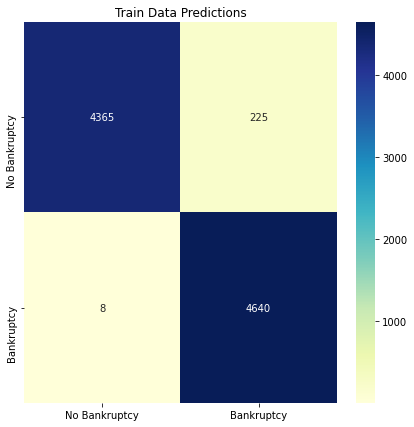



Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.95      0.97      4590
           1       0.95      1.00      0.98      4648

    accuracy                           0.97      9238
   macro avg       0.98      0.97      0.97      9238
weighted avg       0.98      0.97      0.97      9238



In [54]:
# Train set prediction
y_train_pred = predict(model,x_train)
predict_graph(y_train,y_train_pred,'Train Data Predictions')